<a href="https://colab.research.google.com/github/NamalSanjaya/CV_A04/blob/main/A04_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data() ## Loading the data set

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
x_train_copy , x_test_copy = x_train.copy() , x_test.copy()

In [4]:
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values

x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')



In [5]:
x_train_copy.shape

(50000, 32, 32, 3)

In [7]:
def Square_Error(predict,true):
  return (1/Ntr) * np.sum( (true - predict)**2)

def sigmoid(arr):
  return 1/(1+np.exp(-arr))

def trainAcc(predict,true):
  return 1 - 1/(Ntr*K)*( np.abs(np.argmax(true , axis=1) - np.argmax(predict , axis=1) )).sum()


In [8]:
def forward(x,y,w,b):
  contain = []
  for each in x:
    predict = sigmoid( np.matmul(w.T , each) + b  )
    contain.append(predict)


  bag_predict = np.asarray(contain)
  loss  = Square_Error(bag_predict,y)

  return loss,bag_predict
  

In [9]:
def W_derivatef(x,y,yht):                                 
  return (1/Ntr) * np.matmul( x.T , (yht - y) ) 

def B_derivatef(y,yht):                                   
  arr = (1/Ntr)*(yht - y)
  ans = np.zeros((K,1),dtype="float32")
  for i in range(K):
    ans[i,0] = np.sum(arr[:,i])
  return ans

In [10]:
def Gradient_Descent(X,Y,epochs):
  std=1e-5
  weight = std*np.random.randn(Din, K)
  baise = np.zeros(K)
  rate = 0.1

  for loops in range(epochs):
    Loss , y_hat  = forward(X,Y,weight,baise)
    diff_W       =  W_derivatef(X,Y,y_hat)
    diff_b       = B_derivatef(Y,y_hat).reshape(K)

    weight = weight - rate * diff_W
    baise  = baise  - rate * diff_b
  
    if loops%2 == 0:
      Acc = trainAcc(y_hat,y_train)
      print("Loss : " , Loss , " | Accuray :", Acc)

  return weight,baise


In [31]:
def Show_Weights(weights):
  fig,ax = plt.subplots(K,1,figsize = (50,50)
  for j in range(K):
    clz = weights[:,j].reshape(32,32,3) * 1e5
    clz = clz.astype('uint8')
    ax[j].matshow(clz)
  plt.show()
    

In [33]:
W , b = Gradient_Descent(x_train,y_train,300)


Loss :  2.500004844066253  | Accuray : 0.661316
Loss :  2.297325573812171  | Accuray : 0.732376
Loss :  2.147906478454162  | Accuray : 0.741606
Loss :  2.017989100790055  | Accuray : 0.7473080000000001
Loss :  1.9029506456370098  | Accuray : 0.7515780000000001
Loss :  1.8004909448047126  | Accuray : 0.754382
Loss :  1.7089587818408063  | Accuray : 0.756292
Loss :  1.6270274839155245  | Accuray : 0.757768
Loss :  1.5535776408875817  | Accuray : 0.759242
Loss :  1.487641641393275  | Accuray : 0.759934
Loss :  1.4283728137289748  | Accuray : 0.760924
Loss :  1.3750258293132869  | Accuray : 0.7614000000000001
Loss :  1.3269427420657887  | Accuray : 0.76192
Loss :  1.2835420947157994  | Accuray : 0.7629360000000001
Loss :  1.2443098619291413  | Accuray : 0.763726
Loss :  1.2087916266940213  | Accuray : 0.764104
Loss :  1.1765856857315988  | Accuray : 0.764798
Loss :  1.1473369175824886  | Accuray : 0.765412
Loss :  1.1207313254847235  | Accuray : 0.7658400000000001
Loss :  1.096491173534138

In [32]:
W.shape

(3072, 10)

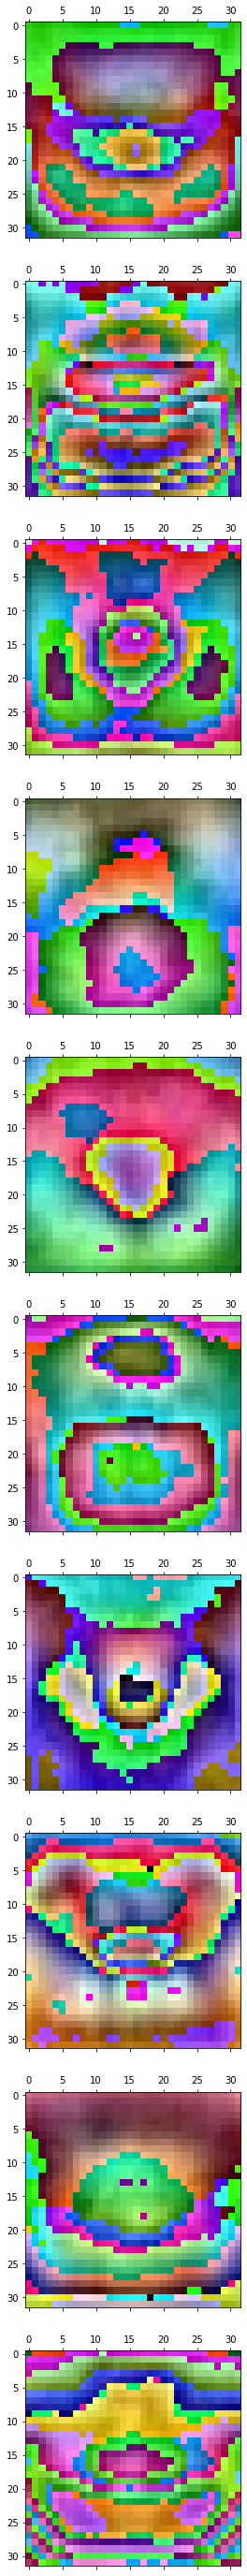

In [30]:
Show_Weights(W)

In [21]:
clz1 = W[:,0].reshape(32,32,3) * 1e5

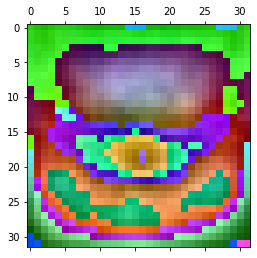

In [22]:
clz1 = clz1.astype("uint8")
plt.matshow(clz1)
plt.show()

In [ ]:
W.shape

(3072, 10)